# Finance DataRader 
- 한국 주식 가격, 미국 주식가격, 지수, 환율, 암호화폐 가격 등 금융 데이터 수집 라이브러리 오픈소스이다.
- https://github.com/FinanceData/FinanceDataReader
- pip install finance-datareader

In [1]:
# 그래프에서 글씨 깨지는것 방지
import matplotlib.pyplot as plt
import platform
platform.system()
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import FinanceDataReader as fdr

'''
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],]
'''

In [54]:
stock_list = [
    ["삼성전자", "005930"],
    ["현대차", "005380"],
    ["NAVER", "035420"],
    ['카카오','035720 '],
    ['KODEX 단기채권','153130'],
    ['현대오토에버','307950'],
    ['대한항공','003490'],
    ['KODEX 2차전지산업','305720'],
    ['KODEX 코스닥150 레버리지','233740'],]
df_list = [fdr.DataReader(code, '2020-03-01', '2021-02-01')['Close'] for name, code in stock_list]
# df_list

In [55]:
# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df = df.corr()

In [58]:
# df

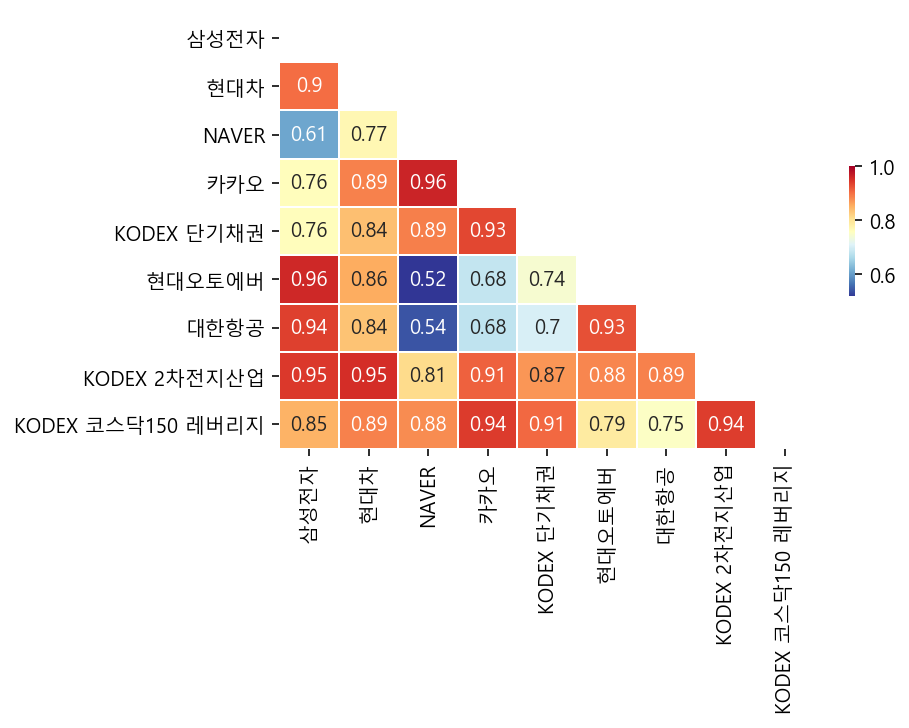

In [59]:
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을  그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .3},# 컬러바 크기 절반으로 줄이기
#             vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()